In [4]:
import sklearn
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
data = np.array([[1,2], [2,3], [3,4], [4,5], [5,6]])

In [7]:
x = data[:,0]

In [8]:
x

array([1, 2, 3, 4, 5])

In [9]:
y= data[:,1]

In [10]:
y

array([2, 3, 4, 5, 6])

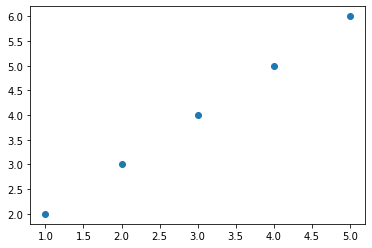

In [11]:
 plt.scatter(x,y)

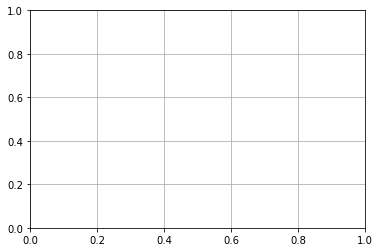

In [12]:
 plt.grid(True)
plt.show() # en ningun lado pongo data o x o y

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vectorizer = CountVectorizer(min_df=1)

In [15]:
content = ["How to format my hard disk", " Hard disk format problems "]

In [16]:
X = vectorizer.fit_transform(content)

In [17]:
vectorizer.get_feature_names()

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

In [18]:
X.toarray()


array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

In [19]:
X.toarray()[0]

array([1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [20]:
X.toarray()[1,2]

1

In [21]:
 from sklearn.datasets import fetch_20newsgroups

In [22]:
 categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics',
'sci.med']

In [23]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
shuffle=True, random_state=42)

In [24]:
 from sklearn.feature_extraction.text import CountVectorizer


In [25]:
vectorizer = CountVectorizer()

In [26]:
 train_counts = vectorizer.fit_transform(twenty_train.data)

In [27]:
vectorizer.vocabulary_.get('algorithm') #4590 recibi

4690

In [28]:
 len(vectorizer.get_feature_names())

35788

In [29]:
vectorizer=CountVectorizer(stop_words='english')

In [30]:
sorted(vectorizer.get_stop_words())[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [31]:
 import nltk

In [32]:
 s = nltk.stem.SnowballStemmer('english')

In [33]:
s.stem("cats")

'cat'

In [34]:
s.stem("loving")

'love'

In [35]:
from nltk.tokenize import word_tokenize

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bernkastel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
text = word_tokenize("And now for something completely different")

In [38]:
 nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Bernkastel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [39]:
nltk.download('maxent_treebank_pos_tagger')


[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\Bernkastel\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [40]:
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [41]:
 from sklearn.feature_extraction.text import CountVectorizer

In [42]:
vectorizer = CountVectorizer(stop_words='english') #igual esto es lo hice de antes creo

In [43]:
analyze = vectorizer.build_analyzer()

In [44]:
analyze("John bought carrots and potatoes")

['john', 'bought', 'carrots', 'potatoes']

In [45]:
import nltk.stem

In [46]:
english_stemmer=nltk.stem.SnowballStemmer('english') #same, este era el s

In [47]:
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
           analyzer=super(StemmedCountVectorizer,self).build_analyzer()
           return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [48]:
 stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')

In [49]:
 stem_analyze = stem_vectorizer.build_analyzer()

In [50]:
Y = stem_analyze("John bought carrots and potatoes")

In [51]:
for tok in Y:
    print(tok)

john
bought
carrot
potato


In [52]:
 categories = ['alt.atheism','soc.religion.christian','comp.graphics', 'sci.med'] #no voy a seguir haciendo imports al pedo

In [53]:
 twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [54]:
train_counts = stem_vectorizer.fit_transform(twenty_train.data)
len(stem_vectorizer.get_feature_names())

26888

In [55]:
#Claro, son menos porque por ejemplo donde decía potatoes y potato, ahora sólo dice potato

In [56]:
vectorizerSpanish = CountVectorizer()
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')
vectorizerSpanish = CountVectorizer(stop_words=stopwords.words('spanish'))

In [57]:
analyze = vectorizerSpanish.build_analyzer()

In [58]:
analyze("John trajo zanahorias y papas") #hasta acá me saca las stop words

['john', 'trajo', 'zanahorias', 'papas']

In [59]:
spanish_stemmer=nltk.stem.SnowballStemmer('spanish')

In [60]:
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
           analyzer=super(StemmedCountVectorizer,self).build_analyzer()
           return lambda doc: (spanish_stemmer.stem(w) for w in analyzer(doc))

In [61]:
 stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words=stopwords.words('spanish'))

In [62]:
 stem_analyze = stem_vectorizer.build_analyzer()

In [63]:
Y = stem_analyze("John trajo zanahorias y papas")

In [64]:
for tok in Y:
    print(tok) 

john
traj
zanahori
pap


In [65]:
#media rancia la salida en español che

In [66]:
Z = stem_analyze("auxilio no sé hacer stem y no lo estoy haciendo")

In [67]:
for tok in Z:
    print(tok) 

auxili
se
hac
stem
hac


In [68]:
Z = stem_analyze("trajo")

In [69]:
for tok in Z:
    print(tok) 

traj
